# Ukrania Russia Tweet Analysis
## Author: Eren ERIS

Bu

In [22]:
#Veriyi okuma ve işleme adımında kullanılacak kütüphaneler
import numpy as np
import pandas as pd
import datetime as dt
import tensorflow as tf
import matplotlib.pyplot as plt
import seaborn as sns
import matplotlib.pyplot as plt

from nltk.sentiment.vader import SentimentIntensityAnalyzer
from wordcloud import WordCloud, STOPWORDS, ImageColorGenerator
import nltk
import re
from nltk.corpus import stopwords
import string

In [3]:
ls

 Volume in drive C is Windows
 Volume Serial Number is 088F-1ED4

 Directory of C:\Users\EREN\Documents\YapayZeka\GitHub\21Project\Ukrania Russia Tweet Analysis

01/04/2024  09:19 PM    <DIR>          .
01/04/2024  09:19 PM    <DIR>          ..
01/04/2024  09:01 PM    <DIR>          .ipynb_checkpoints
12/24/2023  07:49 PM         2,248,957 archive.zip
02/28/2023  12:40 AM         6,273,077 filename.csv
01/04/2024  09:19 PM            10,507 Untitled.ipynb
               3 File(s)      8,532,541 bytes
               3 Dir(s)  60,959,207,424 bytes free


In [4]:
df = pd.read_csv("filename.csv")

In [5]:
df.head()

,id,conversation_id,created_at,date,time,timezone,user_id,username,name,place,...,geo,source,user_rt_id,user_rt,retweet_id,reply_to,retweet_date,translate,trans_src,trans_dest
0,1630366235354451969,1630152070530576385,2023-02-28 00:36:15 UTC,2023-02-28,00:36:15,0,1493761817406894086,tomasliptai,Tomas Liptai,NaN,...,NaN,NaN,NaN,NaN,NaN,"[{'screen_name': 'nazijaeger__', 'name': 'nazi...",NaN,NaN,NaN,NaN
1,1630366226424778753,1630366226424778753,2023-02-28 00:36:13 UTC,2023-02-28,00:36:13,0,1526694166662721536,paperfloure,Smell the roses,NaN,...,NaN,NaN,NaN,NaN,NaN,[],NaN,NaN,NaN,NaN
2,1630366225930027011,1630366225930027011,2023-02-28 00:36:13 UTC,2023-02-28,00:36:13,0,1053018392939167746,katetbar1,@etak,NaN,...,NaN,NaN,NaN,NaN,NaN,[],NaN,NaN,NaN,NaN
3,1630366223056662530,1630351686974992385,2023-02-28 00:36:12 UTC,2023-02-28,00:36:12,0,602371247,jlhrdhmom,JLHrdh,NaN,...,NaN,NaN,NaN,NaN,NaN,"[{'screen_name': 'MainelifeR', 'name': 'Mainel...",NaN,NaN,NaN,NaN
4,1630366221483884545,1629903982255644672,2023-02-28 00:36:12 UTC,2023-02-28,00:36:12,0,1053594763214184448,phemikali,rolarkcybersecurity,NaN,...,NaN,NaN,NaN,NaN,NaN,"[{'screen_name': 'Pottingpinks', 'name': 'GRS'...",NaN,NaN,NaN,NaN


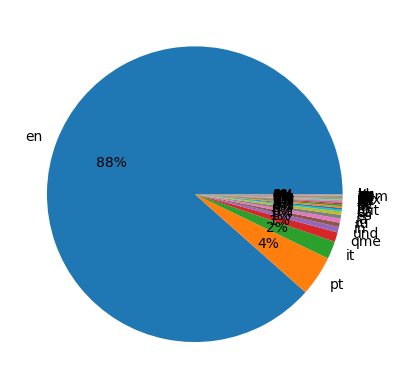

In [13]:
# Dil gruplamasını yaparak her bir dilin sayısını hesaplayın
language_counts = df["language"].value_counts()

# Dil dağılımınızı görselleştirin
plt.pie(language_counts, labels=language_counts.index, autopct='%.0f%%')

# Grafikleri gösterin
plt.show()

In [14]:
df = df[["username", "tweet", "language"]]

In [15]:
df.isnull().sum()

username    0
tweet       0
language    0
dtype: int64

In [16]:
nltk.download('stopwords')
stemmer = nltk.SnowballStemmer("english")
stopword=set(stopwords.words('english'))

def clean(text):
    text = str(text).lower()
    text = re.sub('\[.*?\]', '', text)
    text = re.sub('https?://\S+|www\.\S+', '', text)
    text = re.sub('<.*?>+', '', text)
    text = re.sub('[%s]' % re.escape(string.punctuation), '', text)
    text = re.sub('\n', '', text)
    text = re.sub('\w*\d\w*', '', text)
    text = [word for word in text.split(' ') if word not in stopword]
    text=" ".join(text)
    text = [stemmer.stem(word) for word in text.split(' ')]
    text=" ".join(text)
    return text
df["tweet"] = df["tweet"].apply(clean)

[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\EREN\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


In [17]:
 def wc(data,bgcolor):
    plt.figure(figsize=(10,10))
    wc=WordCloud(background_color=bgcolor)
    wc.generate(' '.join(data))
    plt.imshow(wc)
    plt.axis('off')

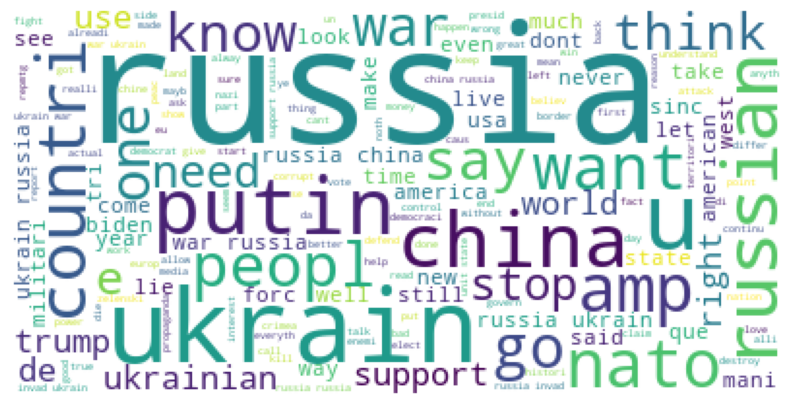

In [19]:
wc(df.tweet,"white")

In [20]:
#Sentiment Analysis
nltk.download('vader_lexicon')
sentiments = SentimentIntensityAnalyzer()
df["Positive"] = [sentiments.polarity_scores(i)["pos"] for i in df["tweet"]]
df["Negative"] = [sentiments.polarity_scores(i)["neg"] for i in df["tweet"]]
df["Neutral"] = [sentiments.polarity_scores(i)["neu"] for i in df["tweet"]]
df = df[["tweet", "Positive", "Negative", "Neutral"]]

[nltk_data] Downloading package vader_lexicon to
[nltk_data]     C:\Users\EREN\AppData\Roaming\nltk_data...
[nltk_data]   Package vader_lexicon is already up-to-date!


In [21]:
df.head()

,tweet,Positive,Negative,Neutral
0,nazijaeg derwen russia place satan rule well,0.259,0.000,0.741
1,russia haarp could destroy usa one fell swoop ...,0.000,0.280,0.720
2,putin give steven seagal order friendship,0.367,0.000,0.633
3,mainelif baddcompani it alway project russia,0.000,0.000,1.000
4,pottingpink mfarussia modrussia milhistrf muze...,0.068,0.078,0.854
